# B26 Badge: Pipeline from Data to Visualisation

The pipeline from raw data to a compelling visualisation involves a series of interconnected steps, each transforming the data into a more refined and insightful form.

There are many visualisation libraries, but in this course we will look at Plotly, and some examples of Matplotlib and Plotnine.

### - In this notebook:

- [Acquiring data and plotting it](#plotly)
- [Transforming real data and visualising it](#real-data)
- [Mini-diary ⭐️⭐️⭐️❓](#mini-diary)
- [More examples of plotting libraries](#more-examples)

<a id="plotly"></a>
## Plotly

Plotly is an open source Python graphing library for making quality visualisations. 

Plotly Documentation: <a href="https://plotly.com/python/">https://plotly.com/python/</a>

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd
import numpy as np

First, let's acquire the data by using Pandas to read a csv.

In [ ]:
patients_df = pd.read_csv('./data/patients.csv')
patients_df

### Plotly Bar Chart

We'll create a simple bar chart using Plotly's Graph Objects (go).

In [29]:
# create a new Plotly figure
fig = go.Figure(
    data=[
        # create a bar chart
        go.Bar(
            # set the x-axis values to the values in the 'diagnosis' column
            x=patients_df['diagnosis'], 
            # set the y-axis values to the values in the 'days_in_hospital' column
            y=patients_df['days_in_hospital']
            )
        ]
    )

# customise the appearance of the figure
fig.update_layout(
    title="Days in Hospital by Diagnosis",
    xaxis_title="Diagnosis",
    yaxis_title="Days in Hospital",
)

fig.show()

In [ ]:
# We can add color using the marker_color attribute

department_colours = {
    'General Medicine': 'skyblue', 
    'Cardiology': 'red', 
    'Orthopedics': 'green',  
    'Rheumatology': 'purple', 
    'Neurology': 'orange', 
    'Endocrinology': 'goldenrod',
}

patients_df['color'] = patients_df['department'].map( lambda dept: department_colours[dept] )

fig = go.Figure(
    data=[
        go.Bar(
                x=patients_df.department, 
                y=patients_df.days_in_hospital, 
                marker_color=patients_df.color
            )
        ]
    )

# customise the appearance of the figure
fig.update_layout(
    title="Days in Hospital by Department",
    xaxis_title="Department",
    yaxis_title="Days in Hospital",
)

fig.show()


### Plotly Scatter Plot

In [43]:
fig = go.Figure(
    data=go.Scatter(
        x=patients_df['age'],
        y=patients_df['blood_pressure_systolic'],
        mode='markers',  # display as markers (points)
        marker=dict(color=patients_df['cholesterol_level'], colorscale='Viridis'), # color based on cholesterol. Notice, it's a dictionary
        text=[f"Cholesterol: {c_level}" for c_level in patients_df['cholesterol_level']] # add cholesterol to hover.
))

fig.update_layout(
    title="Age vs. Systolic Blood Pressure",
    xaxis_title="Age",
    yaxis_title="Systolic Blood Pressure",
    coloraxis_colorbar=dict(title="Cholesterol Level"),
    template="plotly_white"  # Clean background style. Try "plotly_dark" or "ggplot2"
)

fig.show()

<a id="real-data"></a>
## Now with some real data

In [ ]:
# Read in the data from the CSV file on the web
nursing_homes_df = pd.read_csv("https://www.opendata.nhs.scot/dataset/75cca0a9-780d-40e0-9e1f-5f4796950794/resource/139f61d8-a87d-419d-b7af-31f555a60c89/download/file3_mean_median_age_years.csv")
nursing_homes_df.head()

In [ ]:
# Pick only the Mean Age statistic
nursing_homes_df.loc[nursing_homes_df['KeyStatistic']=='Mean Age']

# Group values by Date to get overall averages
averages = nursing_homes_df['Value'].groupby(nursing_homes_df['Date']).mean()
print(type(averages)) # What type is averages? It's a series. So basically one column of a dataframe
averages                

In [ ]:
# Let's turn it into a DataFrame, for ease of use
averages_df = pd.DataFrame(averages)
averages_df

In [ ]:
fig = go.Figure(
    data=[go.Scatter(y=averages_df.Value, 
                 x=averages_df.index)]
)
fig.show()

In [ ]:
# Do you see what is going wrong with the above graph? (on the x axis)
# That's because the x axis values are numbers like 20201029 instead of actual datetime objects
# Let's fix that!

In [ ]:
averages_df = pd.DataFrame(averages)
averages_df.index = pd.to_datetime(averages_df.index, format='%Y%m%d')
averages_df

In [ ]:
fig = go.Figure(
    data=[go.Scatter(y=averages_df.Value, 
                 x=averages_df.index)]
)

fig.update_layout(
    title="Avg. Number of Nursing Home Residents",
    xaxis_title="Year",
    yaxis_title="Count",
    template="plotly_white"  # Clean background style. Try "plotly_dark" or "ggplot2"
)

fig.show()
# Notice that the x axis suddenly makes sense!

# And to sum it up: Let's try to use more than one part of the dataset:

In [ ]:
nursing_homes_df = pd.read_csv("https://www.opendata.nhs.scot/dataset/75cca0a9-780d-40e0-9e1f-5f4796950794/resource/139f61d8-a87d-419d-b7af-31f555a60c89/download/file3_mean_median_age_years.csv")
nursing_homes_df

# Create a dataframe
stats_df = pd.DataFrame(nursing_homes_df['Value'].groupby(nursing_homes_df['Date']).mean())
# Then add a few more columns. For example 1 standard deviation up and down from mean.
stats_df['Median'] = nursing_homes_df['Value'].groupby(nursing_homes_df['Date']).median()
stats_df['Stdev'] = nursing_homes_df['Value'].groupby(nursing_homes_df['Date']).std()
stats_df['Stdev_top'] = stats_df['Value']  + stats_df['Stdev'] 
stats_df['Stdev_bottom'] = stats_df['Value']  - stats_df['Stdev'] 

stats_df['Max'] = nursing_homes_df['Value'].groupby(nursing_homes_df['Date']).max()
stats_df['Min'] = nursing_homes_df['Value'].groupby(nursing_homes_df['Date']).min()

# And let's make the dates real dates!
stats_df.index = pd.to_datetime(stats_df.index, format='%Y%m%d')
stats_df

In [ ]:
fig = go.Figure(
    data=[go.Scatter(y=stats_df.Value, x=stats_df.index, name="Mean"),
         go.Scatter(y=stats_df.Stdev_bottom, x=stats_df.index, name="1 standard dev down"),
         go.Scatter(y=stats_df.Median, x=stats_df.index, name="Median"),
         go.Scatter(y=stats_df.Stdev_top, x=stats_df.index, name="1 standard dev up")]
)
fig.show()

<a id="mini-diary"></a>
## ⭐️⭐️⭐️💥 What you learned in this session: Three stars and a wish 
**In your own words** write in your Learn diary:

- 3 things you yould like to remember from this badge
- 1 thing you wish to understand better in the future or a question you'd like to ask


<a id="more-examples"></a>
# Some more examples of plotting libraries

## Matplotlib

In Matplotlib it looks very similar. Matplotlib is very popular, but needs more care to look great. Note: These are examples of what can be done and to get the minimal graph, you don't need them all. Also, there are many other customisations available other then the ones shown here.

Matplotlib Documentation: <a href="https://matplotlib.org/stable/users/index.html">https://matplotlib.org/stable/users/index.html</a>

### Matplotlib Bar Chart

In [ ]:
import matplotlib.pyplot as plt

patients_df = pd.read_csv('./data/patients.csv')
patients_df
    
# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(patients_df.age, patients_df.blood_pressure_systolic, color="skyblue")

# Add labels and title
plt.title("Age", fontsize=14, loc="left")
plt.ylabel("Systolic Blood Pressure", fontsize=12)
plt.xlabel("Patient Age", fontsize=12)
# Angle the x-axis labels
plt.xticks(rotation=30)

# Show the plot
plt.show()

### Matplotlib Scatter Plot

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # For colourmaps

patients_df = pd.read_csv('./data/patients.csv')
patients_df

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

scatter = plt.scatter(
    patients_df.age,
    patients_df.blood_pressure_systolic,
    c=patients_df.cholesterol_level,  # Colour based on cholesterol
    cmap=cm.viridis,  # Use the viridis colormap
    s=50,  # Marker size
    alpha=0.8  # Marker transparency
)


# Add labels and title
plt.title("Age vs. Systolic Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Systolic Blood Pressure")

# Add a colourbar
cbar = plt.colorbar(scatter)
cbar.set_label("Cholesterol Level")

# Show the plot
plt.show()

## Plotnine

Plotnine is an implementation of the grammar of graphics in Python based on ggplot2 which you might be familiar with from R.

Plotnine Documentation: <a href="https://plotnine.org/">https://plotnine.org/</a>

In [46]:
# RUN THIS CODE TO INSTALL THE plotnine PACKAGE BEFORE TRYING TO RUN THE CODE BELOW
# This code installs the package plotnine if it is not already installed
# You only need to run this code once

import subprocess
 
def install_this(package_name):
    try:
        __import__(package_name)
    except ImportError:
        subprocess.run(f"pip install {package_name}", shell = True, executable="/bin/bash")
 
package = 'plotnine'
print(install_this(package))

None


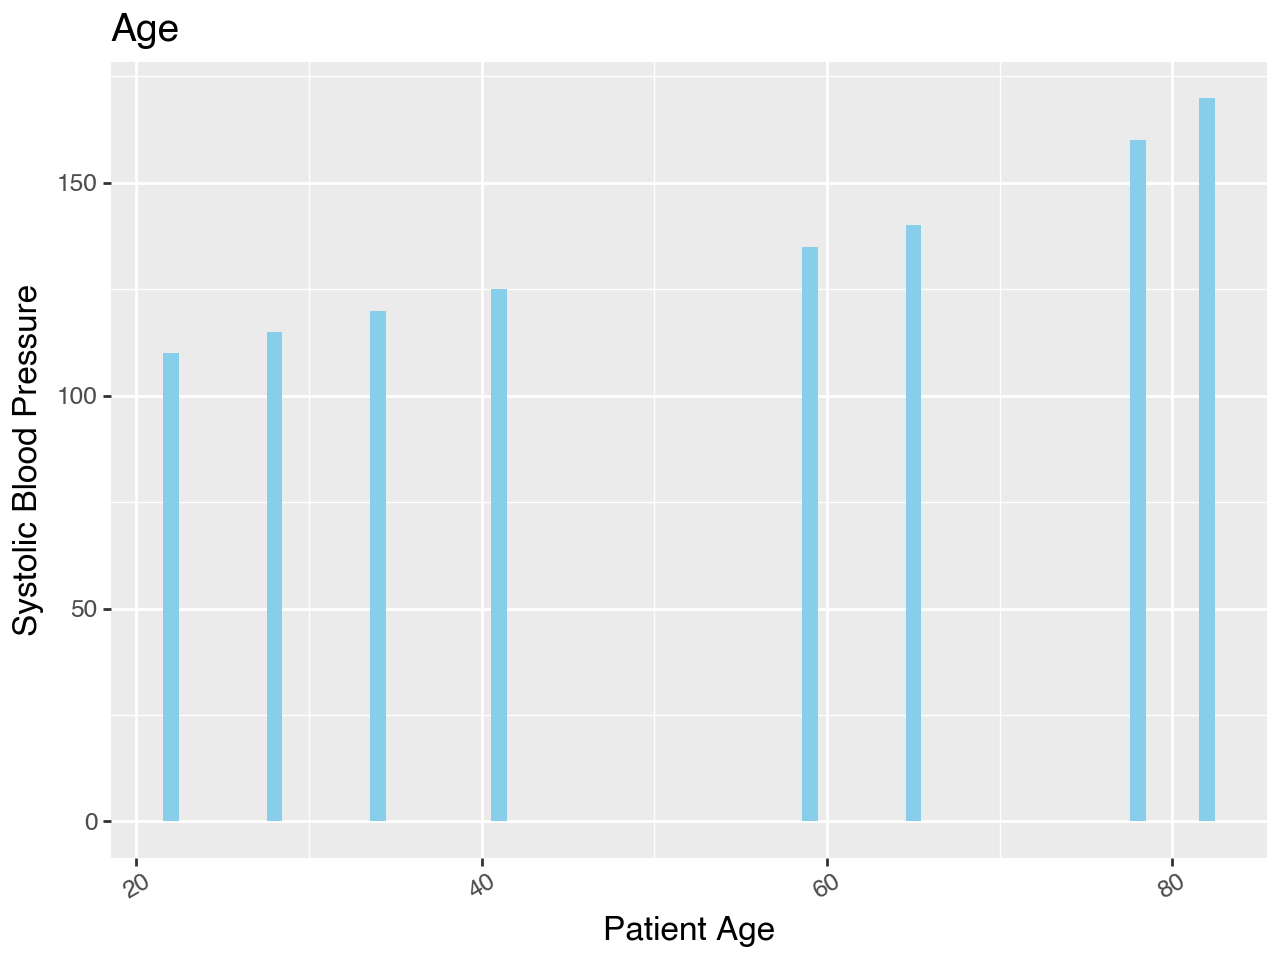

In [47]:
from plotnine import ggplot, geom_bar, aes, labs, theme, element_text

patients_df = pd.read_csv('./data/patients.csv')
patients_df

# Create the plotnine bar chart
plot = (
    ggplot(patients_df, aes(x='age', y='blood_pressure_systolic'))
    + geom_bar(stat='identity', fill='skyblue')  # stat='identity' means use the y values directly
    + labs(
        title="Age",
        y="Systolic Blood Pressure",
        x="Patient Age"
    )
    + theme(
        plot_title=element_text(size=14, ha='left'), # ha is horizontal alignment.
        axis_title_y=element_text(size=12),
        axis_title_x=element_text(size=12),
        axis_text_x=element_text(angle=30)
    )
)

# Show the plot
plot

### Plotnine Scatterplot

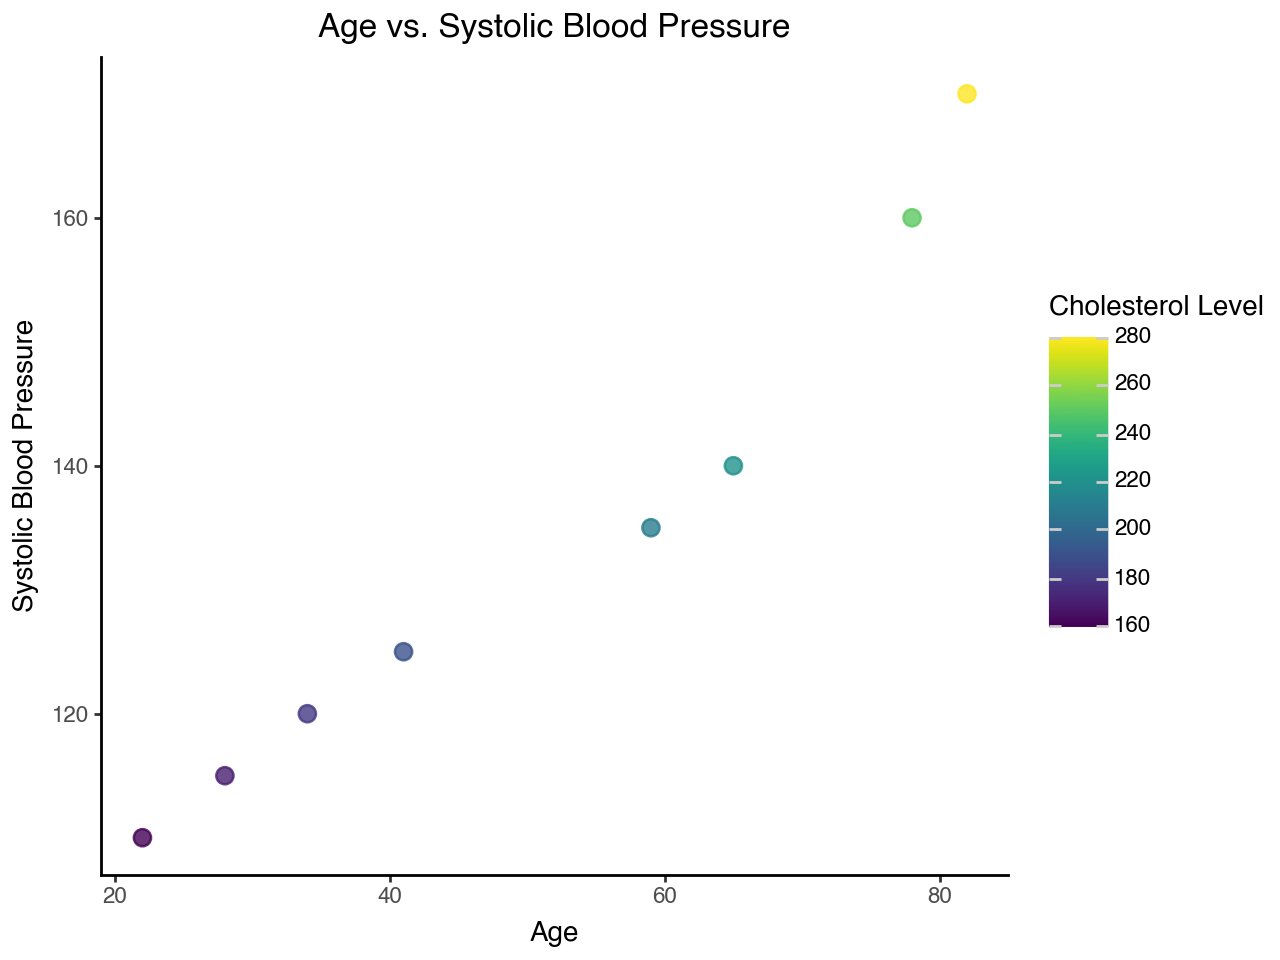

In [ ]:
from plotnine import ggplot, aes, geom_point, labs, theme, scale_color_cmap, theme_classic

# Create the plotnine scatter plot
plot = (
    ggplot(patients_df, aes(x='age', y='blood_pressure_systolic', color='cholesterol_level'))
    + geom_point(size=3, alpha=0.8)  # Adjust size as needed
    + labs(
        title="Age vs. Systolic Blood Pressure",
        x="Age",
        y="Systolic Blood Pressure",
        color="Cholesterol Level"
    )
    + scale_color_cmap(cmap_name='viridis')
    + theme_classic(base_size=10) # Or any other theme. Try theme_bw or theme_minimal (note: you'll need to add these to the import statement above)
)

# Show the plot
plot